## Data Cleaning

#### We have 2 datasets here — training set and test set.

#### The training set contains the features, along with the prices of the flights. It contains 10683 records, 10 input features and 1 output column — ‘Price’.

#### The test set contains 2671 records and 10 input features. The output ‘Price’ column needs to be predicted in this set. We will use Regression techniques here, since the predicted output will be a continuous value.


Following is the description of features available in the dataset –
1. Airline: The name of the airline.
2. Date_of_Journey: The date of the journey
3. Source: The source from which the service begins.
4. Destination: The destination where the service ends.
5. Route: The route taken by the flight to reach the destination.
6. Dep_Time: The time when the journey starts from the source.
7. Arrival_Time: Time of arrival at the destination.
8. Duration: Total duration of the flight.
9. Total_Stops: Total stops between the source and destination.
10. Additional_Info: Additional information about the flight
11. Price: The price of the ticket

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
#importing the data
df = pd.read_csv("/Users/jyotisubham/Documents/my_projects/Flight ticket price prediction/notebooks/datasets/Data_Train_ml.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# cheking if there is missing value
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We have 1 missing value in Route column, and 1 missing value in Total stops column. We have to
 replace the missing values going further but for now we have to create list of catagorical columns and check the unique values in it.
 

In [6]:
# list of catagory i choose 

category = ['Airline', 'Source', 'Destination', 'Additional_Info']

In [7]:
# checking unique values in catagory
for i in category:
    print(i, df[i].unique())
    print('==================================================================================')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


##### We obsorve :-

1. Airline column has 12 unique values - 'IndiGo' , 'Air India', 'Jet Airways' , 'SpiceJet' , 'Multiple carriers' , 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy' , 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet'.
2. Source column has 5 unique values – ‘Bangalore’, ‘Kolkata’, ‘Chennai’, ‘Delhi’ and ‘Mumbai’.
3. Destination column has 6 unique values - 'New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi' , 'Hyderabad'.
4. Additional info column has 10 unique values - 'No info', 'In-flight meal not included', 'No check-in baggage included', '1 Short layover' , 'No Info', '1 Long layover', 'Change airports' , 'Business class', 'Red-eye flight' , '2 Long layover'.


next spliting the Date column to extract the ‘Date’, ‘Month’ and ‘Year’ values, and store them in new columns in our dataframe.

In [8]:
# Converting 'Date_of_Journey' column to string type
df['Date_of_Journey'] = df['Date_of_Journey'].astype(str)

# Using the apply() function along with a lambda function to split each element by '/'
df['Date_of_Journey'] = df['Date_of_Journey'].apply(lambda x: x.split('/'))


df.Date_of_Journey


0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [9]:
# Exteracting the data to ansure the index. 

df['Date'] = df.Date_of_Journey.str[0]
df['Month'] = df.Date_of_Journey.str[1]
df['Year'] = df.Date_of_Journey.str[2]

spliting the Route column to create multiple columns with cities that the flight travels through. The maximum number of stops that a flight has, 

In [10]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [11]:
# Convert the 'Route' column to string type
df['Route'] = df['Route'].astype(str)

# Split the 'Route' column by the '->' delimiter
df['Route'] = df['Route'].str.split('→')


print(df['Route'])


0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object


In [12]:
df['city1'] = df.Route.str[0]
df['city2'] = df.Route.str[1]
df['city3'] = df.Route.str[2]
df['city4'] = df.Route.str[3]
df['city5'] = df.Route.str[4]
df['city6'] = df.Route.str[5]

#### Dep_time

In [13]:
# Convert the 'Dep_time' column to string type
df['Dep_Time'] = df['Dep_Time'].astype(str)

# Split the 'Dep_time' column by the ':' delimiter
df['Dep_Time'] = df['Dep_Time'].str.split(':')


df.Dep_Time

0        [22, 20]
1        [05, 50]
2        [09, 25]
3        [18, 05]
4        [16, 50]
           ...   
10678    [19, 55]
10679    [20, 45]
10680    [08, 20]
10681    [11, 30]
10682    [10, 55]
Name: Dep_Time, Length: 10683, dtype: object

In [14]:
df['Dep_Time_Hour'] = df.Dep_Time.str[0]
df['Dep_Time_Min'] = df.Dep_Time.str[1]

In [15]:
print(df['Dep_Time_Hour'])
print(df['Dep_Time_Min'])

0        22
1        05
2        09
3        18
4        16
         ..
10678    19
10679    20
10680    08
10681    11
10682    10
Name: Dep_Time_Hour, Length: 10683, dtype: object
0        20
1        50
2        25
3        05
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Dep_Time_Min, Length: 10683, dtype: object


#### Arrival_Time into date and time



In [16]:
# Convert the 'Arrival_Time' column to string type
df['Arrival_Time'] = df['Arrival_Time'].astype(str)

# Split the 'Arrival_Time' column by the ', ' delimiter
df['Arrival_Time'] = df['Arrival_Time'].str.split(', ')

# Extract the date component and assign it to the 'Arrival_date' column
df['Arrival_date'] = df['Arrival_Time'].apply(lambda x: ' '.join(x[0].split()[-2:]).strip("['\"]") if len(x[0].split()) > 1 else None)

# Display the modified DataFrame
print(df[['Arrival_date']])



      Arrival_date
0           22 Mar
1             None
2           10 Jun
3             None
4             None
...            ...
10678         None
10679         None
10680         None
10681         None
10682         None

[10683 rows x 1 columns]


In [17]:
# Define a regular expression pattern to extract the time component
pattern = r'(\d{2}:\d{2})'

# Extract the time component and assign it to the 'Time_of_arrival' column
df['Time_of_arrival'] = df['Arrival_Time'].str[0].str.extract(pattern)

# Display the modified DataFrame
print(df[['Time_of_arrival']])


      Time_of_arrival
0               01:10
1               13:15
2               04:25
3               23:30
4               21:35
...               ...
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15

[10683 rows x 1 columns]


In [18]:
df['Time_of_arrival'] = df['Time_of_arrival'].astype(str)

df['Time_of_arrival'] = df['Time_of_arrival'].str.split(':')

print(df['Time_of_arrival'])

0        [01, 10]
1        [13, 15]
2        [04, 25]
3        [23, 30]
4        [21, 35]
           ...   
10678    [22, 25]
10679    [23, 20]
10680    [11, 20]
10681    [14, 10]
10682    [19, 15]
Name: Time_of_arrival, Length: 10683, dtype: object


In [19]:
df['Arrival_Time_hour'] = df.Time_of_arrival.str[0]
df['Arrival_Time_min'] = df.Time_of_arrival.str[1]

print(df['Arrival_Time_hour'])
print(df['Arrival_Time_min'])

0        01
1        13
2        04
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Time_hour, Length: 10683, dtype: object
0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_Time_min, Length: 10683, dtype: object


#### Duration - Travel_hours & Travel_mins

In [20]:
df['Duration'] = df['Duration'].astype(str)

df['Duration'] = df['Duration'].str.split(':')

print(df['Duration'])

0        [2h 50m]
1        [7h 25m]
2           [19h]
3        [5h 25m]
4        [4h 45m]
           ...   
10678    [2h 30m]
10679    [2h 35m]
10680        [3h]
10681    [2h 40m]
10682    [8h 20m]
Name: Duration, Length: 10683, dtype: object


In [21]:
# Extract the hours component from the 'Duration' column
df['Travel_hours'] = df.Duration.str[0]

# Split the 'Travel_hours' column by 'h' to separate hours and minutes
df['Travel_hours'] = df['Travel_hours'].str.split('h')

# Extract only the hours component
df['Travel_hours'] = df['Travel_hours'].str[0]

# Update the 'Travel_hours' column in the DataFrame
df['Travel_hours'] = df['Travel_hours']

print(df['Travel_hours'])

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Travel_hours, Length: 10683, dtype: object


In [22]:
# Convert the 'Duration' column to string type
df['Duration'] = df['Duration'].astype(str)

# Extract the minutes component from the 'Duration' column
df['Travel_mins'] = df['Duration'].str.extract(r'(\d+)m')

print(df['Travel_mins'])

0         50
1         25
2        NaN
3         25
4         45
        ... 
10678     30
10679     35
10680    NaN
10681     40
10682     20
Name: Travel_mins, Length: 10683, dtype: object


#### Total_stops

In [23]:
df.Total_Stops.replace('non-stop', '0', inplace = True)

/var/folders/tb/gtmb02yd3hj20cy3s2lssndr0000gp/T/ipykernel_1928/967888588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Total_Stops.replace('non-stop', '0', inplace = True)


In [24]:
df.Total_Stops = df.Total_Stops.str.split(' ')
print(df['Total_Stops'])

0               [0]
1        [2, stops]
2        [2, stops]
3         [1, stop]
4         [1, stop]
            ...    
10678           [0]
10679           [0]
10680           [0]
10681           [0]
10682    [2, stops]
Name: Total_Stops, Length: 10683, dtype: object


In [25]:
df.Total_Stops = df.Total_Stops.str[0]


#### Additional_Info

In [26]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [27]:
df.Additional_Info.replace('No Info', 'no info', inplace = True)
df.Additional_Info.unique()

/var/folders/tb/gtmb02yd3hj20cy3s2lssndr0000gp/T/ipykernel_1928/3226274064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Additional_Info.replace('No Info', 'no info', inplace = True)


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'no info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

#### Replacing the missing values

In [28]:
df.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
city1                    0
city2                    1
city3                 3492
city4                 9117
city5                10637
city6                10682
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_date          6348
Time_of_arrival          0
Arrival_Time_hour        0
Arrival_Time_min         0
Travel_hours             0
Travel_mins           1031
dtype: int64

We proceed by dropping the original columns from which we extracted the relevant information. Additionally, we eliminate columns such as 'city6' and 'city5' due to their high prevalence of missing values. This refinement reduces our dataset to 20 distinct columns, which we intend to utilize for training our machine learning model. However, before proceeding with the model, we address any missing values and investigate the contents of the columns, examining their potential impact on the flight prices. This analysis guides us in identifying a final selection of columns to include in our model.

In [29]:
# Drop columns 'city4', 'city5', and 'city6' as most values are nan
df.drop(['city4', 'city5', 'city6'], axis=1, inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,city2,city3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_hour,Arrival_Time_min,Travel_hours,Travel_mins
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]",[01:10 22 Mar],['2h 50m'],0,No info,...,DEL,NaN,22,20,22 Mar,"[01, 10]",01,10,2,50
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],['7h 25m'],2,No info,...,IXR,BBI,05,50,None,"[13, 15]",13,15,7,25
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]",[04:25 10 Jun],['19h'],2,No info,...,LKO,BOM,09,25,10 Jun,"[04, 25]",04,25,19,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],['5h 25m'],1,No info,...,NAG,BLR,18,05,None,"[23, 30]",23,30,5,25
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],['4h 45m'],1,No info,...,NAG,DEL,16,50,None,"[21, 35]",21,35,4,45


In [30]:
# Locate the row where 'City1' data is missing
missing_city1_row = df[df['city1'].isnull()]

# Replace missing values in the located row
df.loc[missing_city1_row.index, 'city1'] = 'DEL'
df.loc[missing_city1_row.index, 'city2'] = 'COK'
df.loc[missing_city1_row.index, 'Total_Stops'] = 0


In [31]:
# For the 'City3' column, replace 'NaN' values with 'None' since missing values indicate direct flights without any intermediate stops.
df['city3'].fillna('None', inplace = True)

/var/folders/tb/gtmb02yd3hj20cy3s2lssndr0000gp/T/ipykernel_1928/3236867061.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city3'].fillna('None', inplace = True)


In [32]:
# For the 'Arrival_date' column, replace missing values with the corresponding values from the 'Date' column, as flights with missing arrival dates imply same-day travel.

df['Arrival_date'].fillna(df['Date'], inplace = True)

/var/folders/tb/gtmb02yd3hj20cy3s2lssndr0000gp/T/ipykernel_1928/3123261744.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival_date'].fillna(df['Date'], inplace = True)


In [33]:
# For the 'Travel_mins' column, replace missing values with 0, as these represent cases where the travel time is in terms of hours only, without additional minutes.

df['Travel_mins'].fillna(0, inplace= True)

/var/folders/tb/gtmb02yd3hj20cy3s2lssndr0000gp/T/ipykernel_1928/3470095438.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Travel_mins'].fillna(0, inplace= True)


In [34]:
# Fill NaN values in 'Total_Stops' column with 0
df['Total_Stops'].fillna(0, inplace=True)

/var/folders/tb/gtmb02yd3hj20cy3s2lssndr0000gp/T/ipykernel_1928/788632717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Stops'].fillna(0, inplace=True)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Date_of_Journey    10683 non-null  object
 2   Source             10683 non-null  object
 3   Destination        10683 non-null  object
 4   Route              10683 non-null  object
 5   Dep_Time           10683 non-null  object
 6   Arrival_Time       10683 non-null  object
 7   Duration           10683 non-null  object
 8   Total_Stops        10683 non-null  object
 9   Additional_Info    10683 non-null  object
 10  Price              10683 non-null  int64 
 11  Date               10683 non-null  object
 12  Month              10683 non-null  object
 13  Year               10683 non-null  object
 14  city1              10683 non-null  object
 15  city2              10682 non-null  object
 16  city3              10683 non-null  objec

In [36]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,city2,city3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_hour,Arrival_Time_min,Travel_hours,Travel_mins
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]",[01:10 22 Mar],['2h 50m'],0,No info,...,DEL,None,22,20,22 Mar,"[01, 10]",01,10,2,50
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],['7h 25m'],2,No info,...,IXR,BBI,05,50,1,"[13, 15]",13,15,7,25
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]",[04:25 10 Jun],['19h'],2,No info,...,LKO,BOM,09,25,10 Jun,"[04, 25]",04,25,19,0
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],['5h 25m'],1,No info,...,NAG,BLR,18,05,12,"[23, 30]",23,30,5,25
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],['4h 45m'],1,No info,...,NAG,DEL,16,50,01,"[21, 35]",21,35,4,45


In [37]:
df[df['Travel_hours']== '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,city2,city3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_hour,Arrival_Time_min,Travel_hours,Travel_mins
6474,Air India,"[6, 03, 2019]",Mumbai,Hyderabad,"[BOM , GOI , PNQ , HYD]","[16, 50]",[16:55],['5m'],2,No info,...,GOI,PNQ,16,50,6,"[16, 55]",16,55,5m,5


In [38]:
df.drop(index=6474, inplace= True, axis=0)

In [39]:
df.Total_Stops = df.Total_Stops.astype('int64')
df.Date = df.Date.astype('int64')
df.Month = df.Month.astype('int64')
df.Year = df.Year.astype('int64')
df.Dep_Time_Hour = df.Dep_Time_Hour.astype('int64')
df.Dep_Time_Min = df.Dep_Time_Min.astype('int64')
df.Dep_Time_Hour = df.Dep_Time_Hour.astype('int64')
df.Dep_Time_Min = df.Dep_Time_Min.astype('int64')
df.Travel_hours = df.Travel_hours.astype('int64')
df.Travel_mins = df.Travel_mins.astype('int64')

In [40]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Date_of_Journey    10682 non-null  object
 2   Source             10682 non-null  object
 3   Destination        10682 non-null  object
 4   Route              10682 non-null  object
 5   Dep_Time           10682 non-null  object
 6   Arrival_Time       10682 non-null  object
 7   Duration           10682 non-null  object
 8   Total_Stops        10682 non-null  int64 
 9   Additional_Info    10682 non-null  object
 10  Price              10682 non-null  int64 
 11  Date               10682 non-null  int64 
 12  Month              10682 non-null  int64 
 13  Year               10682 non-null  int64 
 14  city1              10682 non-null  object
 15  city2              10681 non-null  object
 16  city3              10682 non-null  object
 17

In [41]:
# List of columns to drop
columns_to_drop = ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Time_of_arrival']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  int64 
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Date               10682 non-null  int64 
 7   Month              10682 non-null  int64 
 8   Year               10682 non-null  int64 
 9   city1              10682 non-null  object
 10  city2              10681 non-null  object
 11  city3              10682 non-null  object
 12  Dep_Time_Hour      10682 non-null  int64 
 13  Dep_Time_Min       10682 non-null  int64 
 14  Arrival_date       10682 non-null  object
 15  Arrival_Time_hour  10682 non-null  object
 16  Arrival_Time_min   10682 non-null  object
 17

## EDA

#### Separeting Categorical and Numerical Data 

In [43]:

categorical = ['Airline', 'Source', 'Destination', 'Additional_Info', 
               'city1', 'city2', 'city3', 'Arrival_date']


numerical = ['Total_Stops', 'Price', 'Date', 'Month', 'Year', 
             'Dep_Time_Hour', 'Dep_Time_Min', 'Arrival_Time_hour', 
             'Arrival_Time_min', 'Travel_hours', 'Travel_mins']


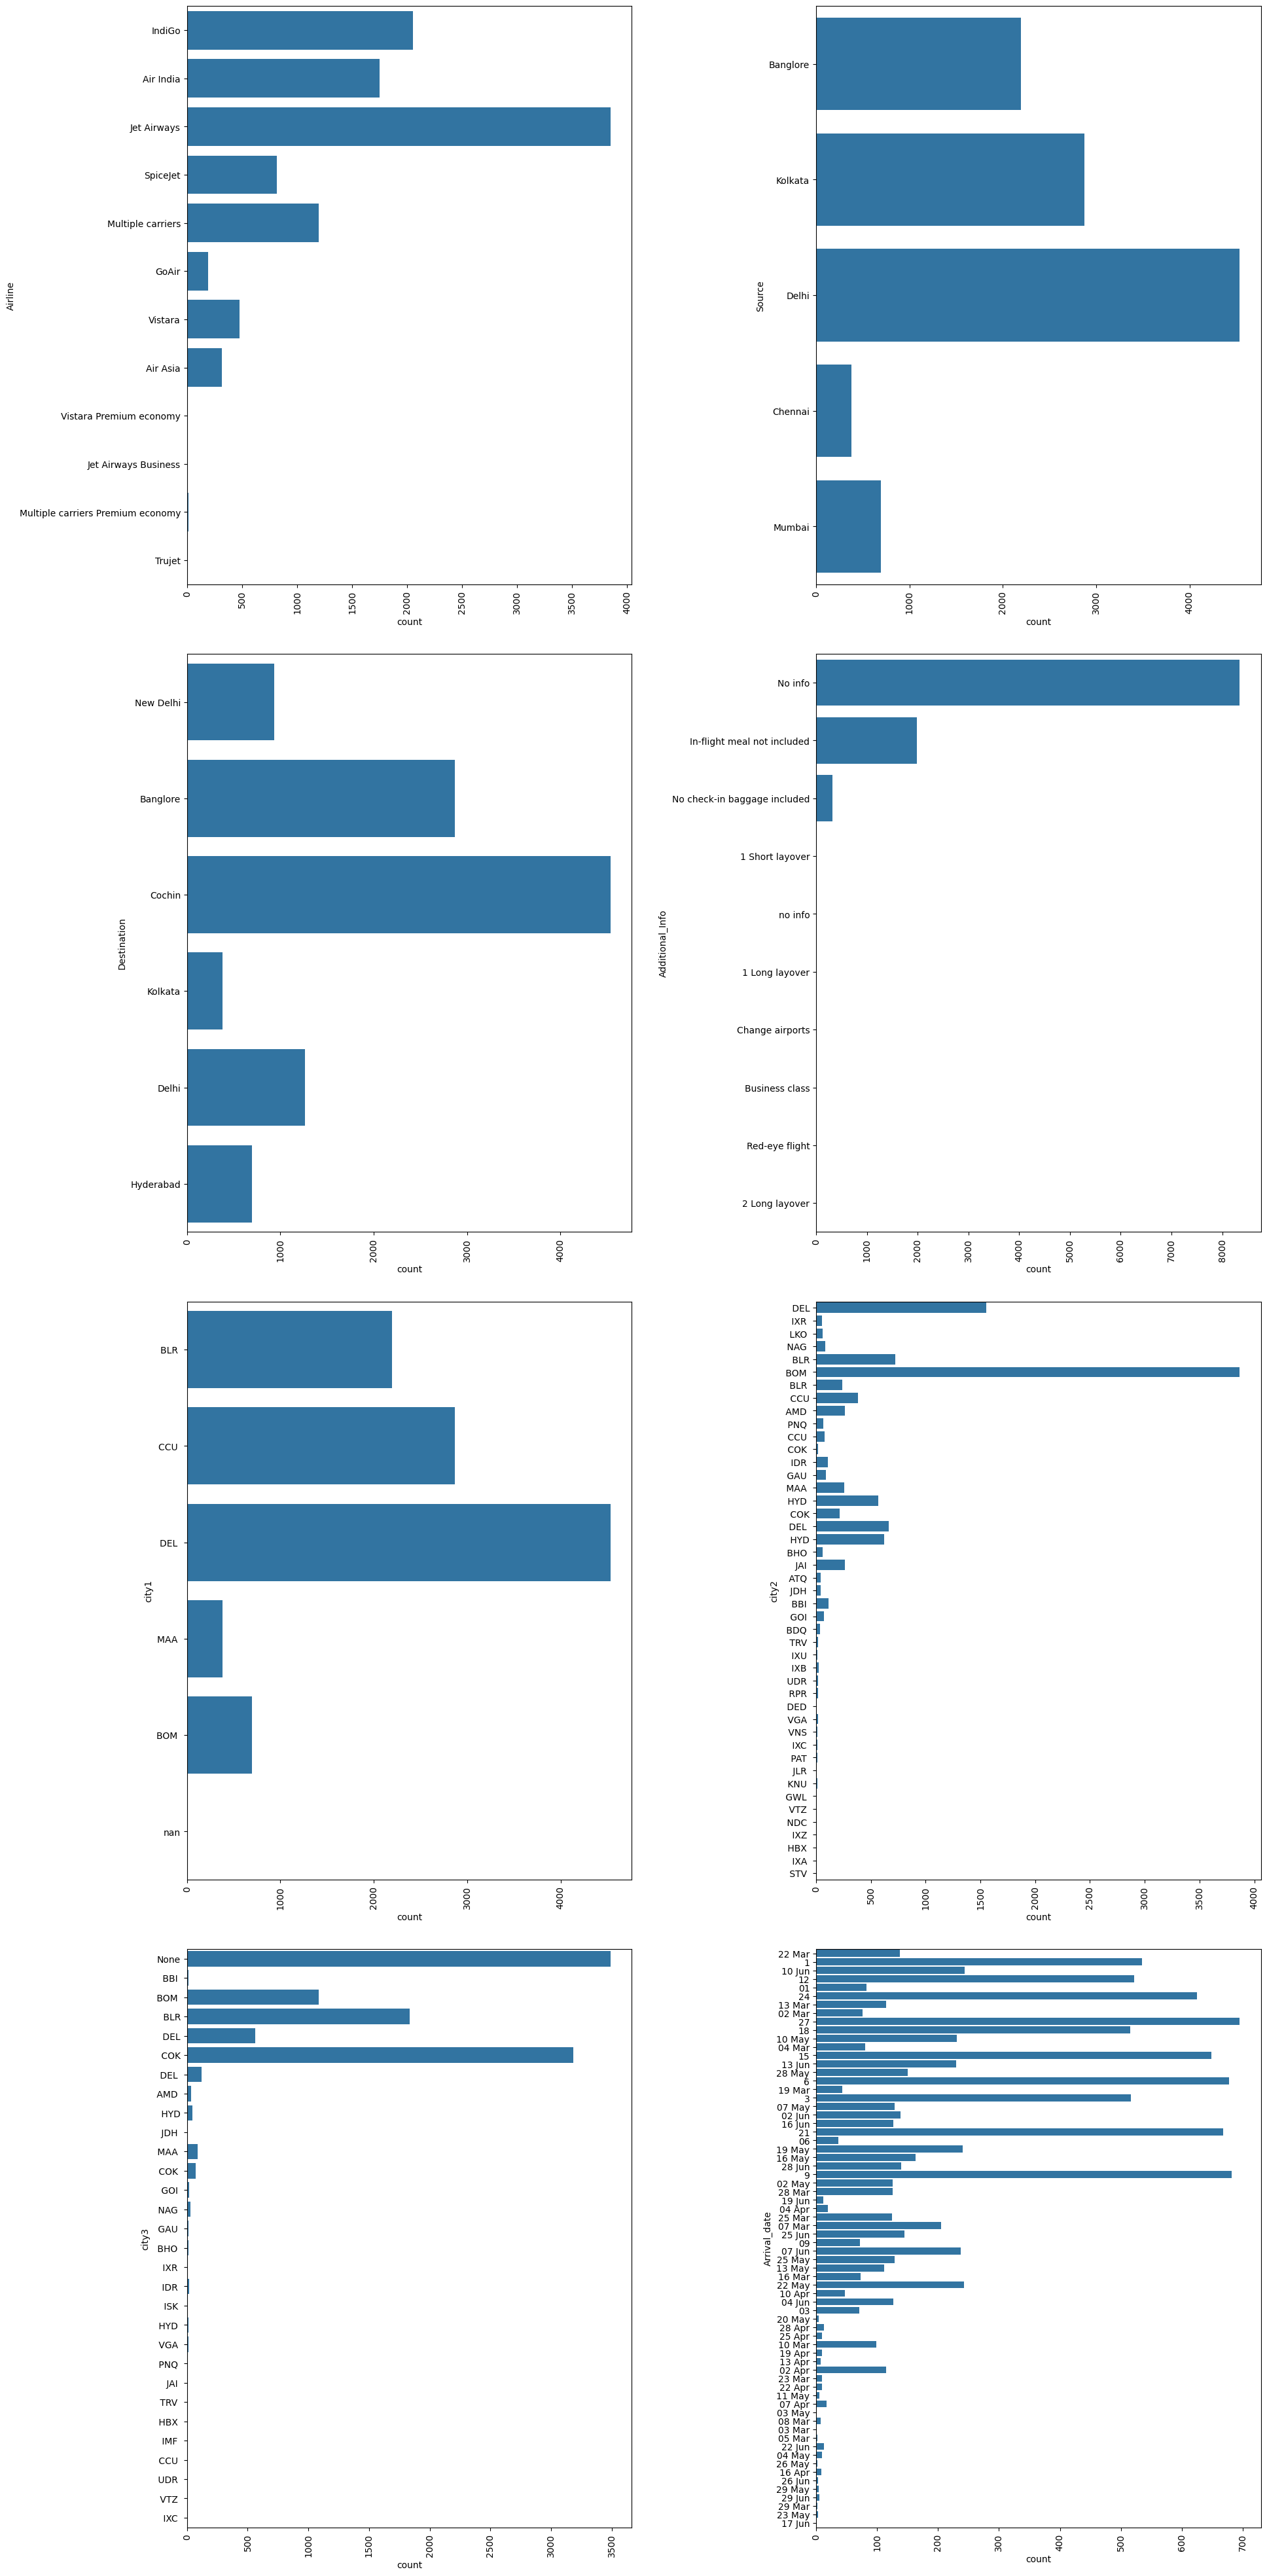

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

c = 1
num_rows = (len(categorical) + 1) // 2  # Calculate the number of rows needed
plt.figure(figsize=(20, 40))  

for i in categorical:
    plt.subplot(num_rows, 2, c)  # Set the maximum number of columns to 2
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c = c + 1

plt.show()



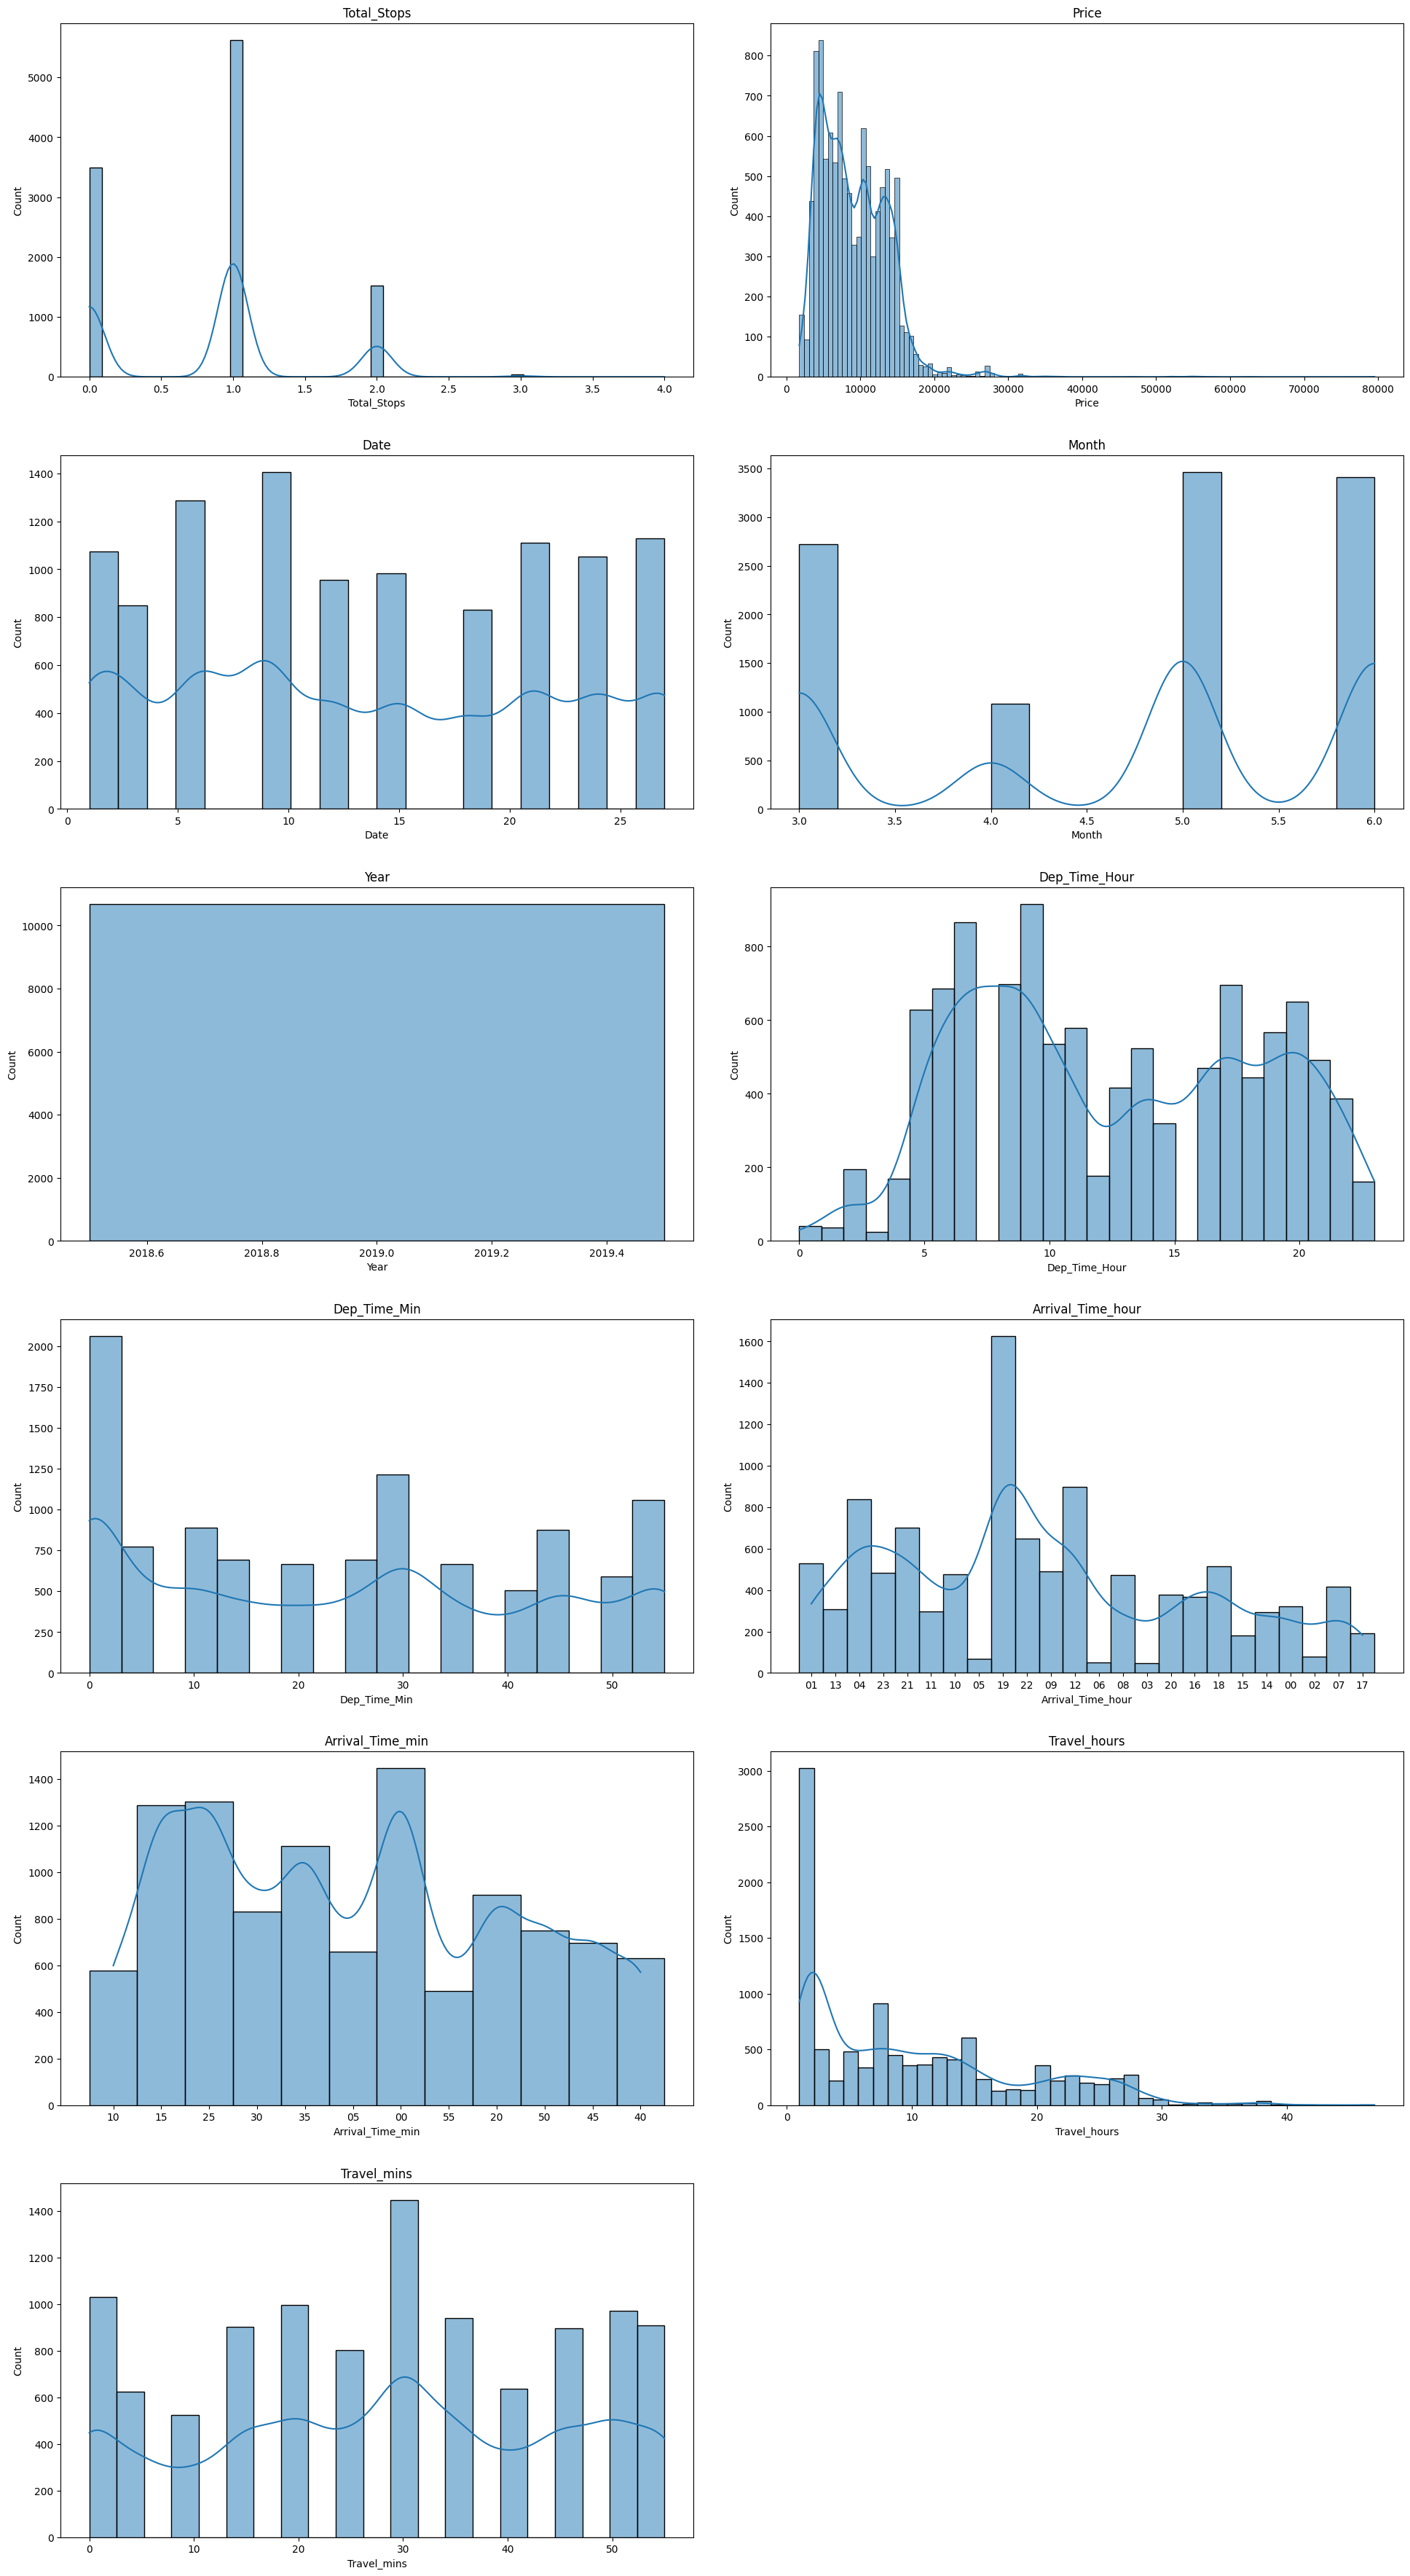

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

num_numerical = len(numerical)
num_rows = (num_numerical + 1) // 2  # Adjust the number of rows based on the number of numerical columns
num_cols = min(2, num_numerical)  # Maximum 2 columns for better visualization

plt.figure(figsize=(20, num_rows * 6))  # Adjust the figure size accordingly

for i, col in enumerate(numerical):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjust the subplot index
    sns.histplot(df[col], kde=True)  # Use histplot for histogram with KDE
    plt.title(col)  # Set the title of each subplot
    plt.tight_layout(pad=3.0)

plt.show()



#### Distribution of Price column


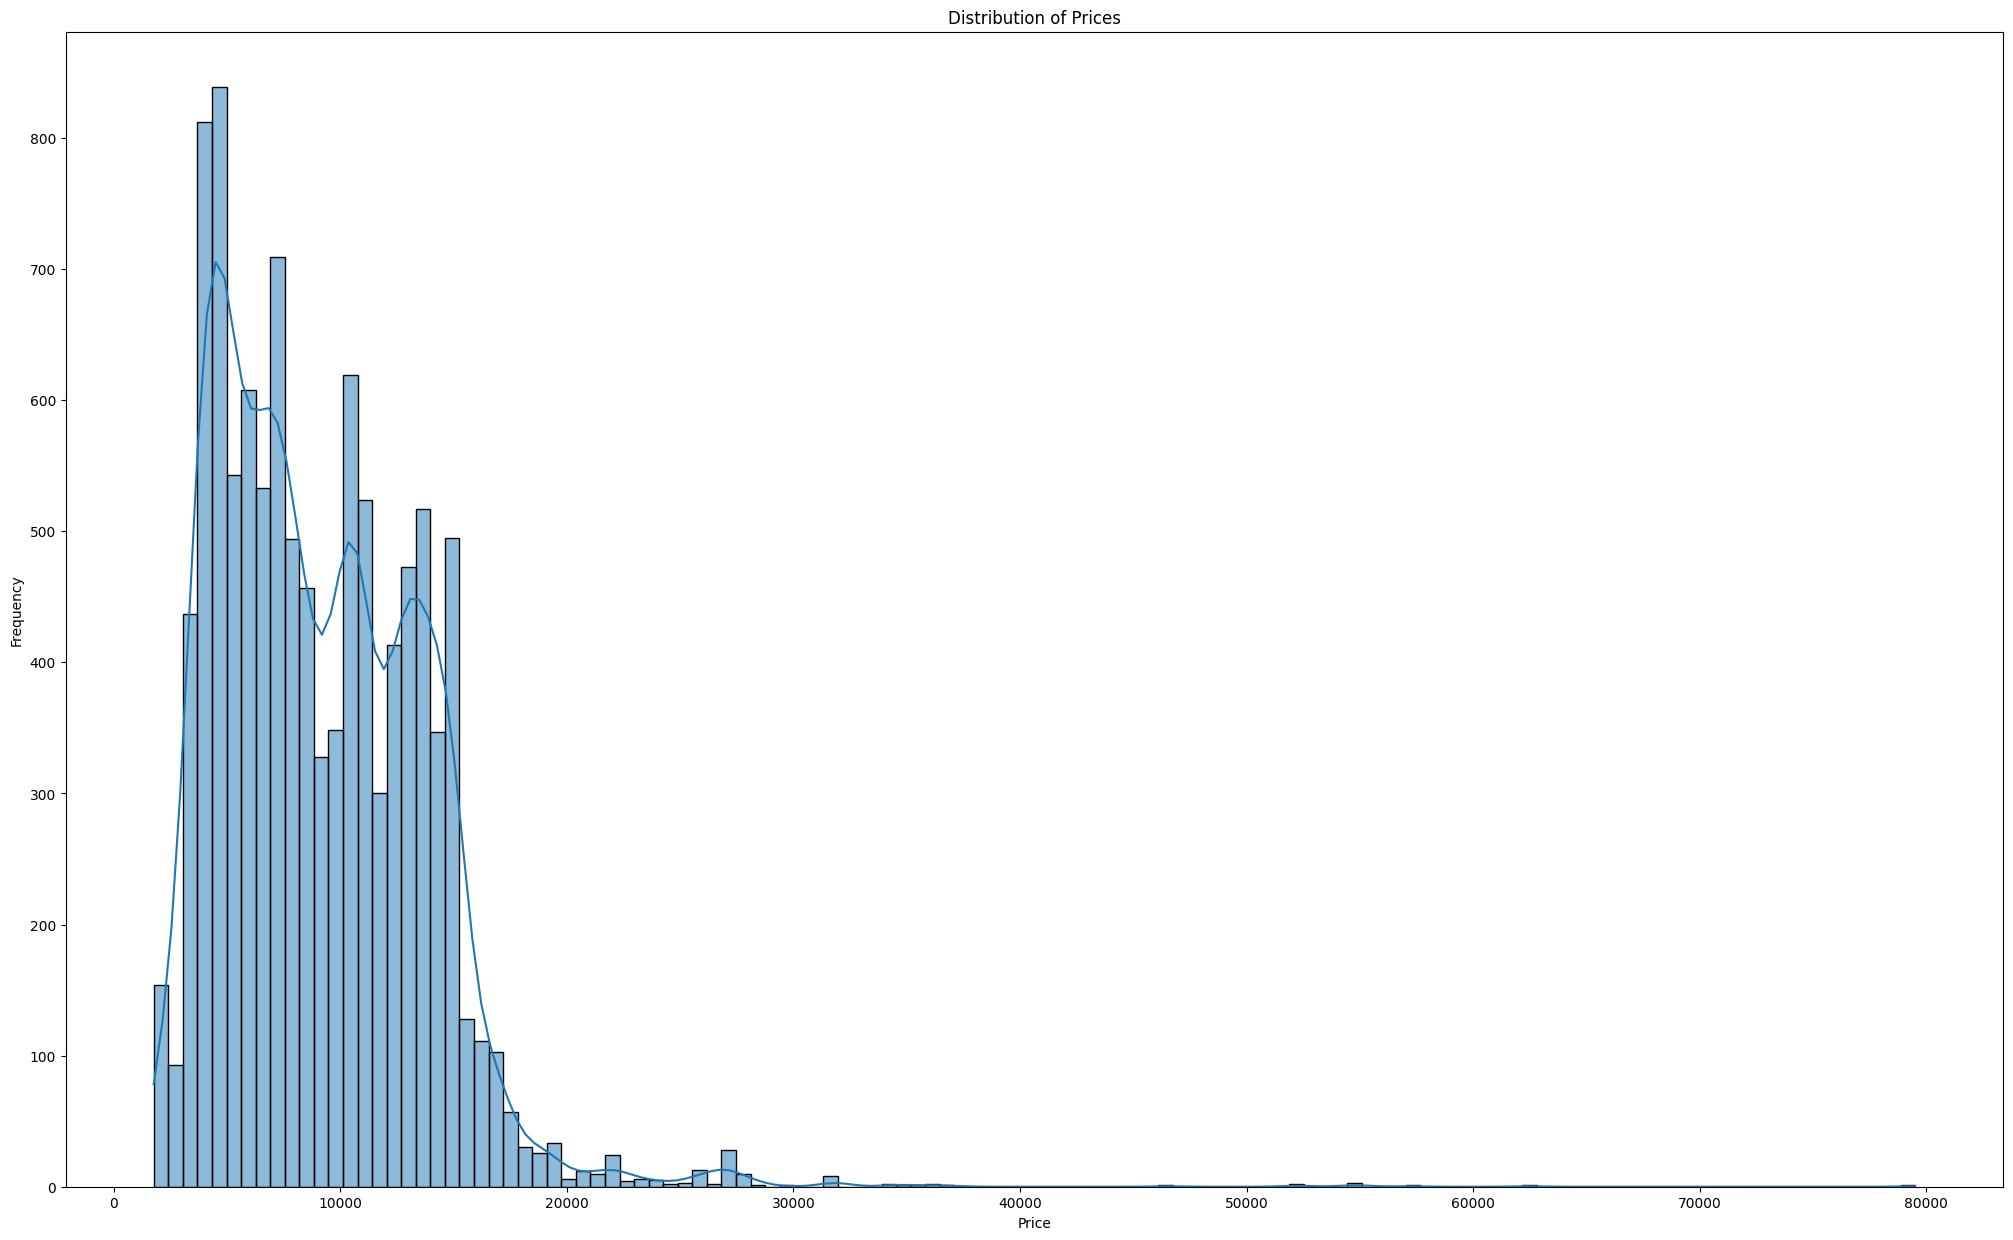

In [46]:
plt.figure(figsize=(25,15))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


#### independent features - price (check the impact on price)

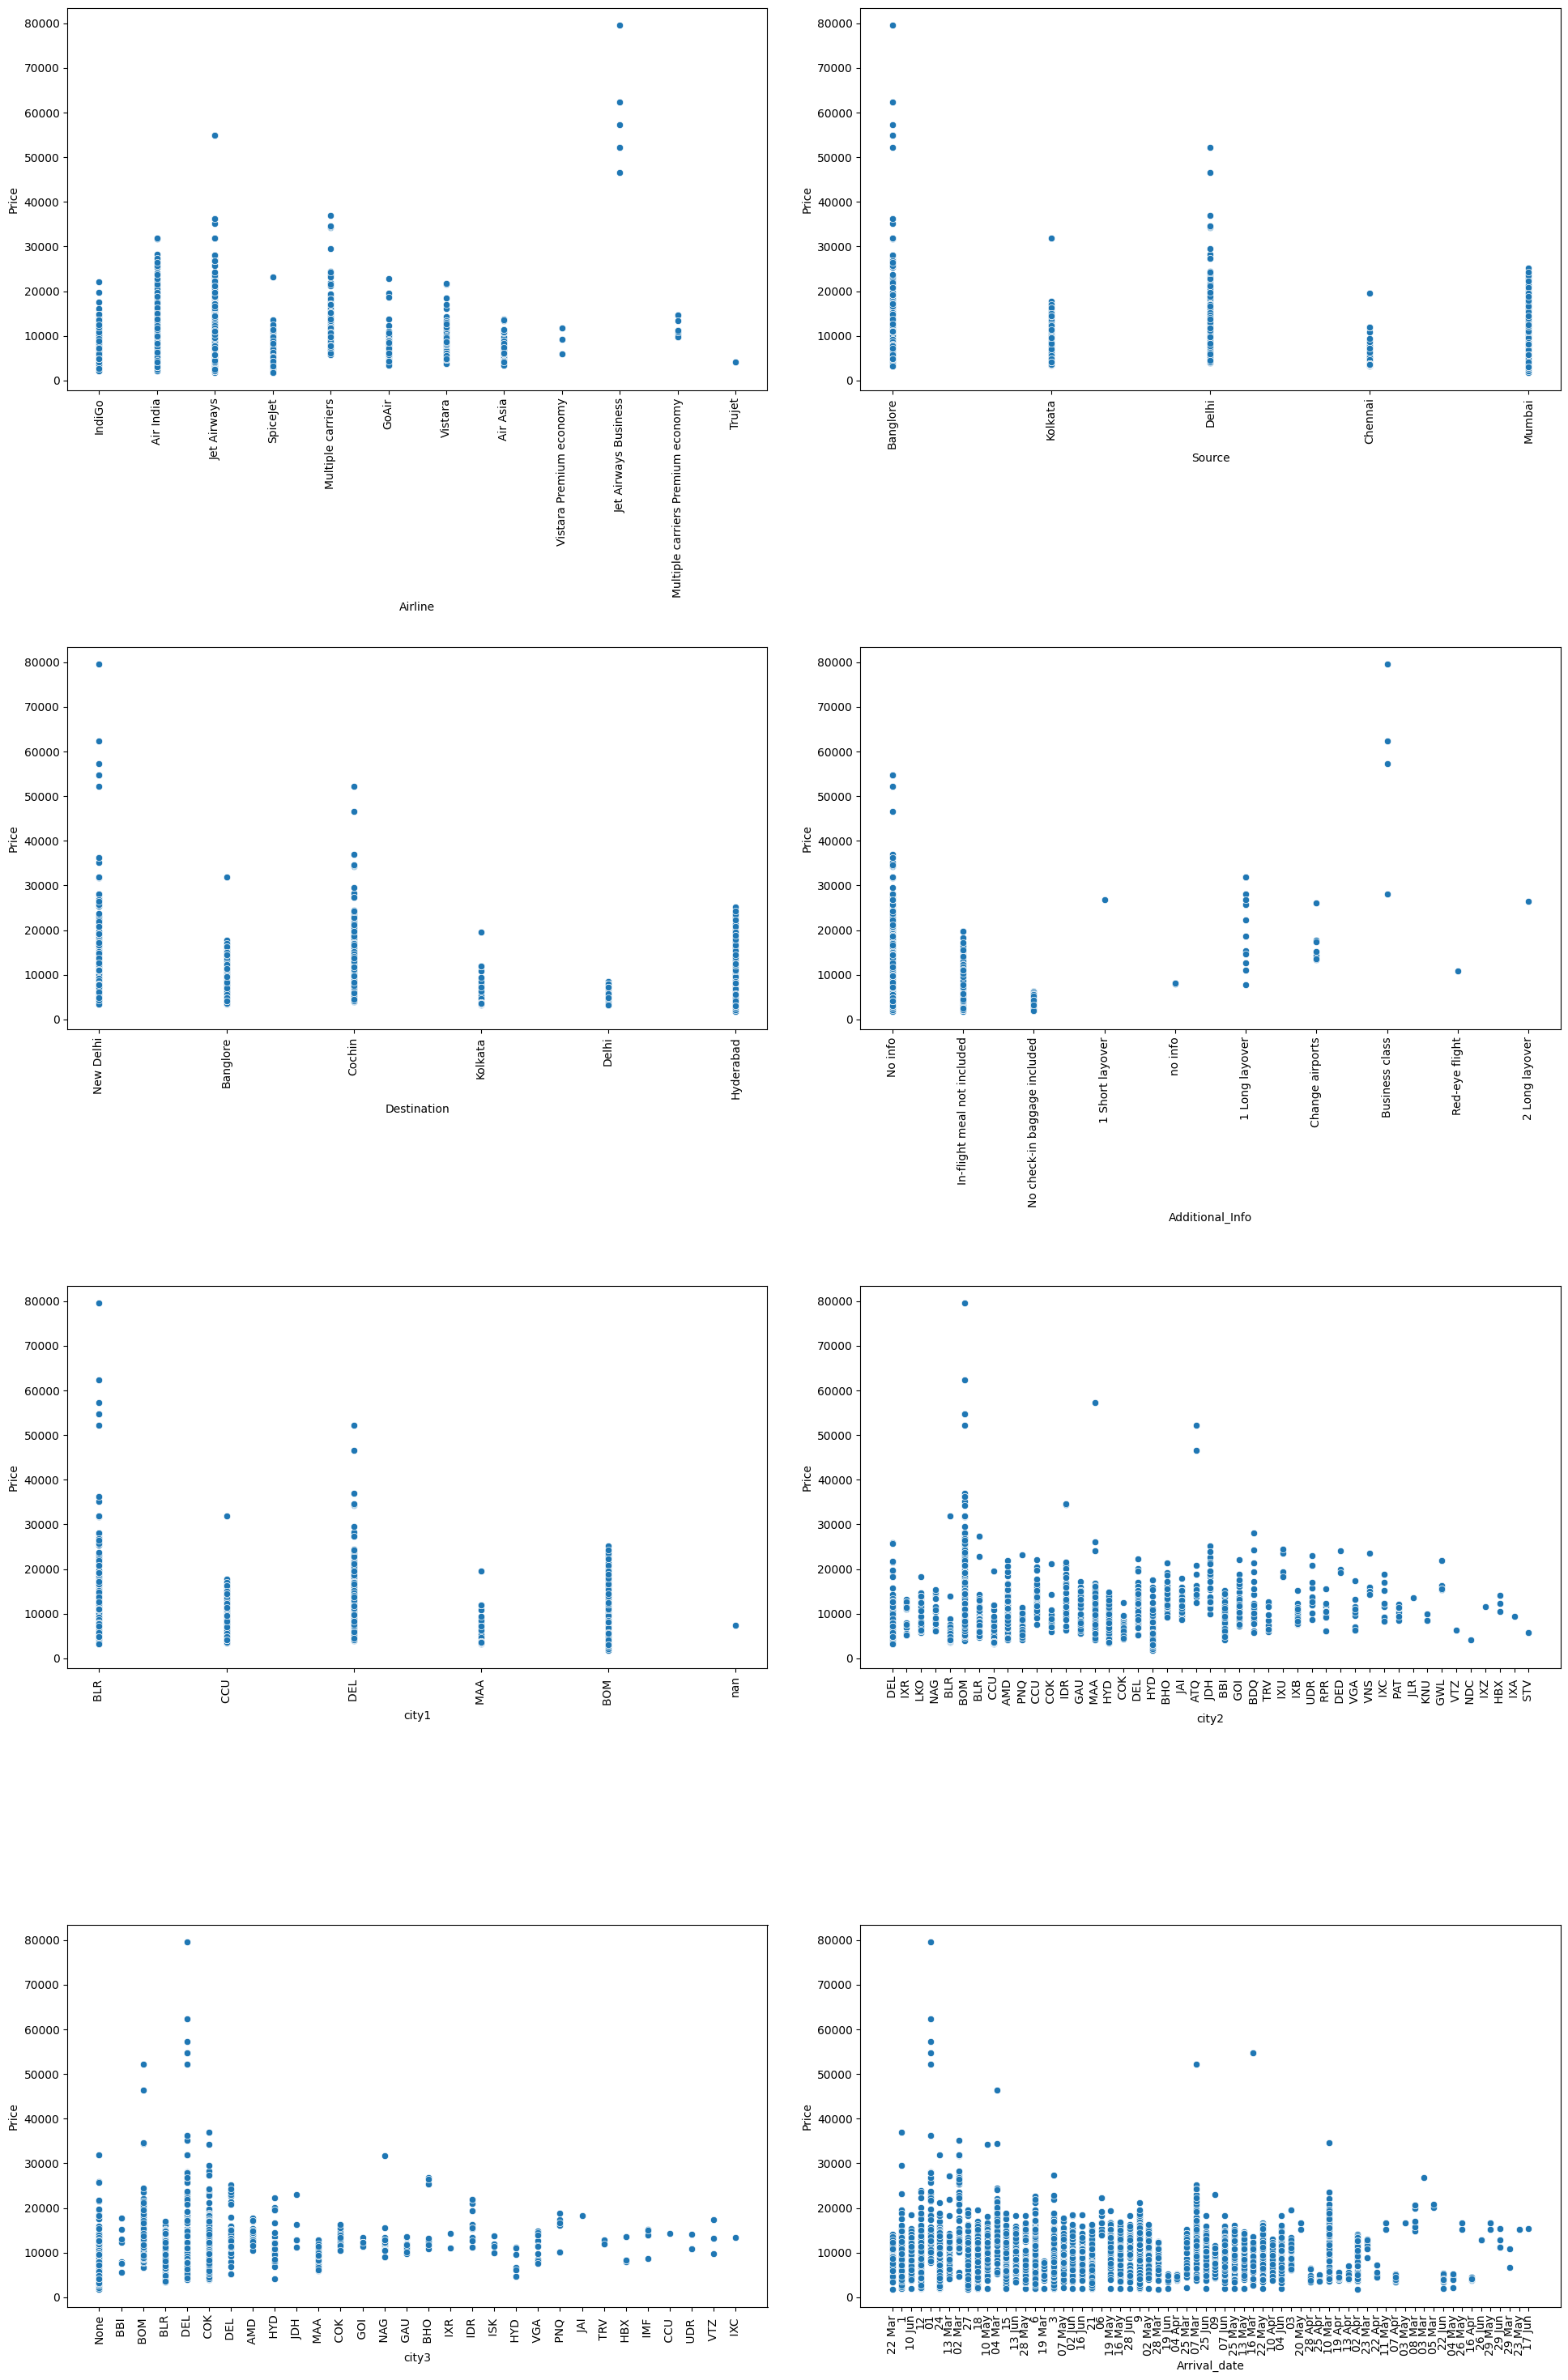

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

c = 1
plt.figure(figsize=(20, 45))

for i in categorical:
    plt.subplot(6, 2, c)
    sns.scatterplot(x=df[i], y=df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c = c + 1

plt.show()


In [48]:
df[df.Price>=50000]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,city1,city2,city3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_hour,Arrival_Time_min,Travel_hours,Travel_mins
657,Jet Airways Business,Banglore,New Delhi,1,No info,52229,1,3,2019,BLR,BOM,DEL,5,45,01,10,45,5,0
1478,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,18,40,16 Mar,00,45,6,5
2618,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,22,50,16 Mar,05,05,6,15
2924,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,1,3,2019,BLR,BOM,DEL,5,45,01,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,1,3,2019,BLR,BOM,DEL,5,45,01,12,25,6,40
5439,Jet Airways,Banglore,New Delhi,1,No info,54826,1,3,2019,BLR,BOM,DEL,16,55,01,23,00,6,5
9715,Jet Airways Business,Delhi,Cochin,2,No info,52285,6,3,2019,DEL,ATQ,BOM,20,5,07 Mar,04,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,1,3,2019,BLR,MAA,DEL,9,45,01,14,25,4,40


#### Price with numerical data

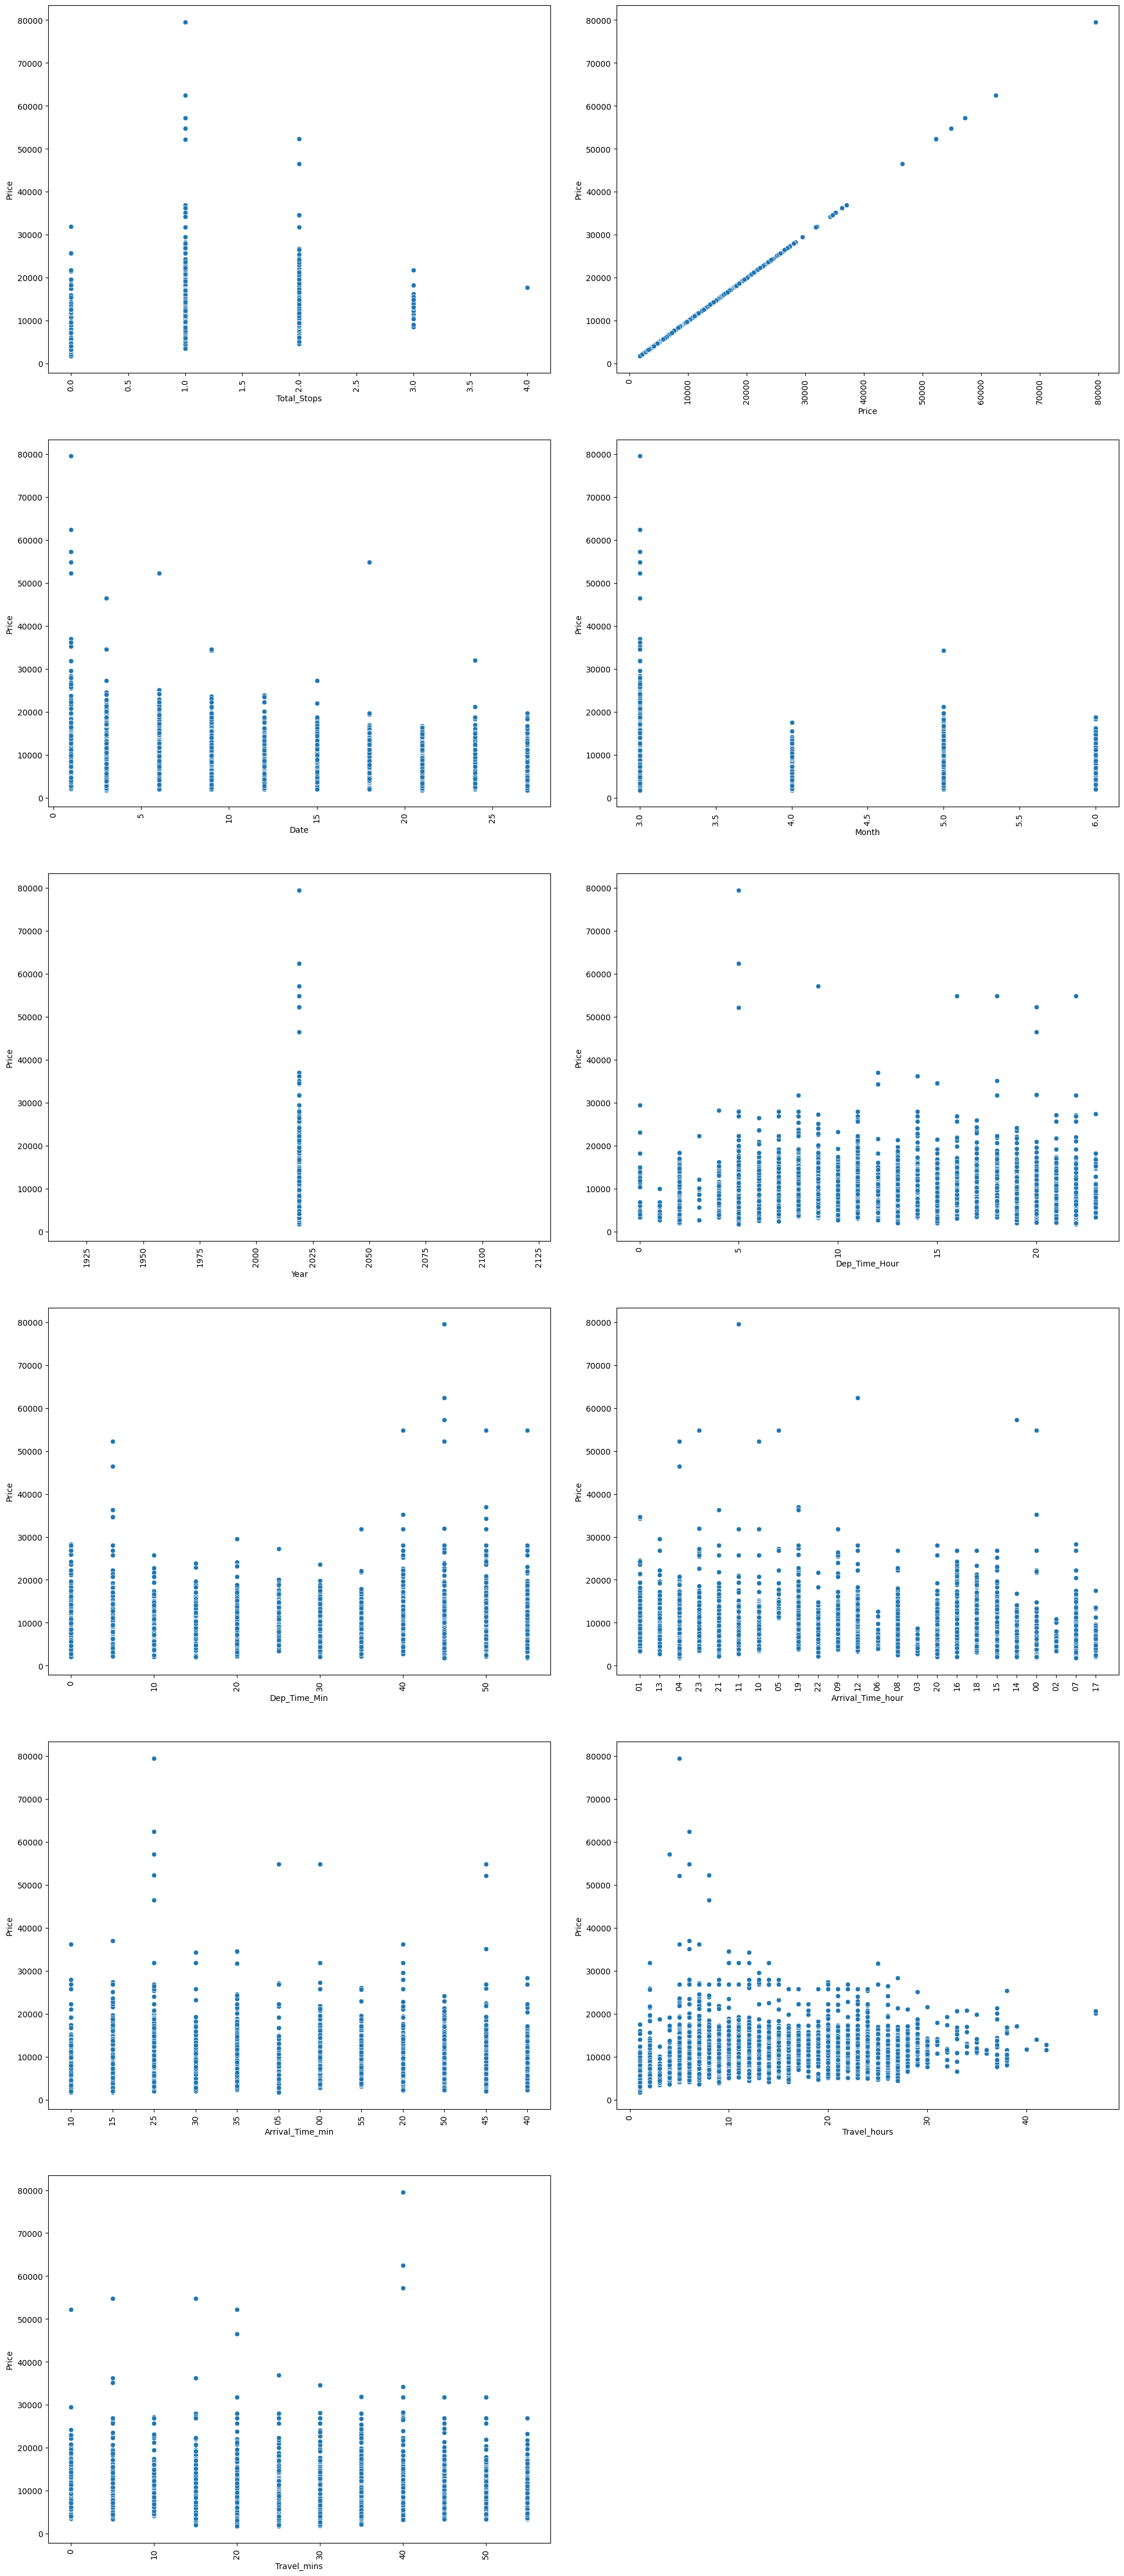

In [49]:

c = 1
plt.figure(figsize=(20, 45))

for i in numerical:
    plt.subplot(6, 2, c) 
    sns.scatterplot(x=df[i], y=df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c = c + 1

plt.show()


#### ploting Box plot to identify the prasence of outliers 

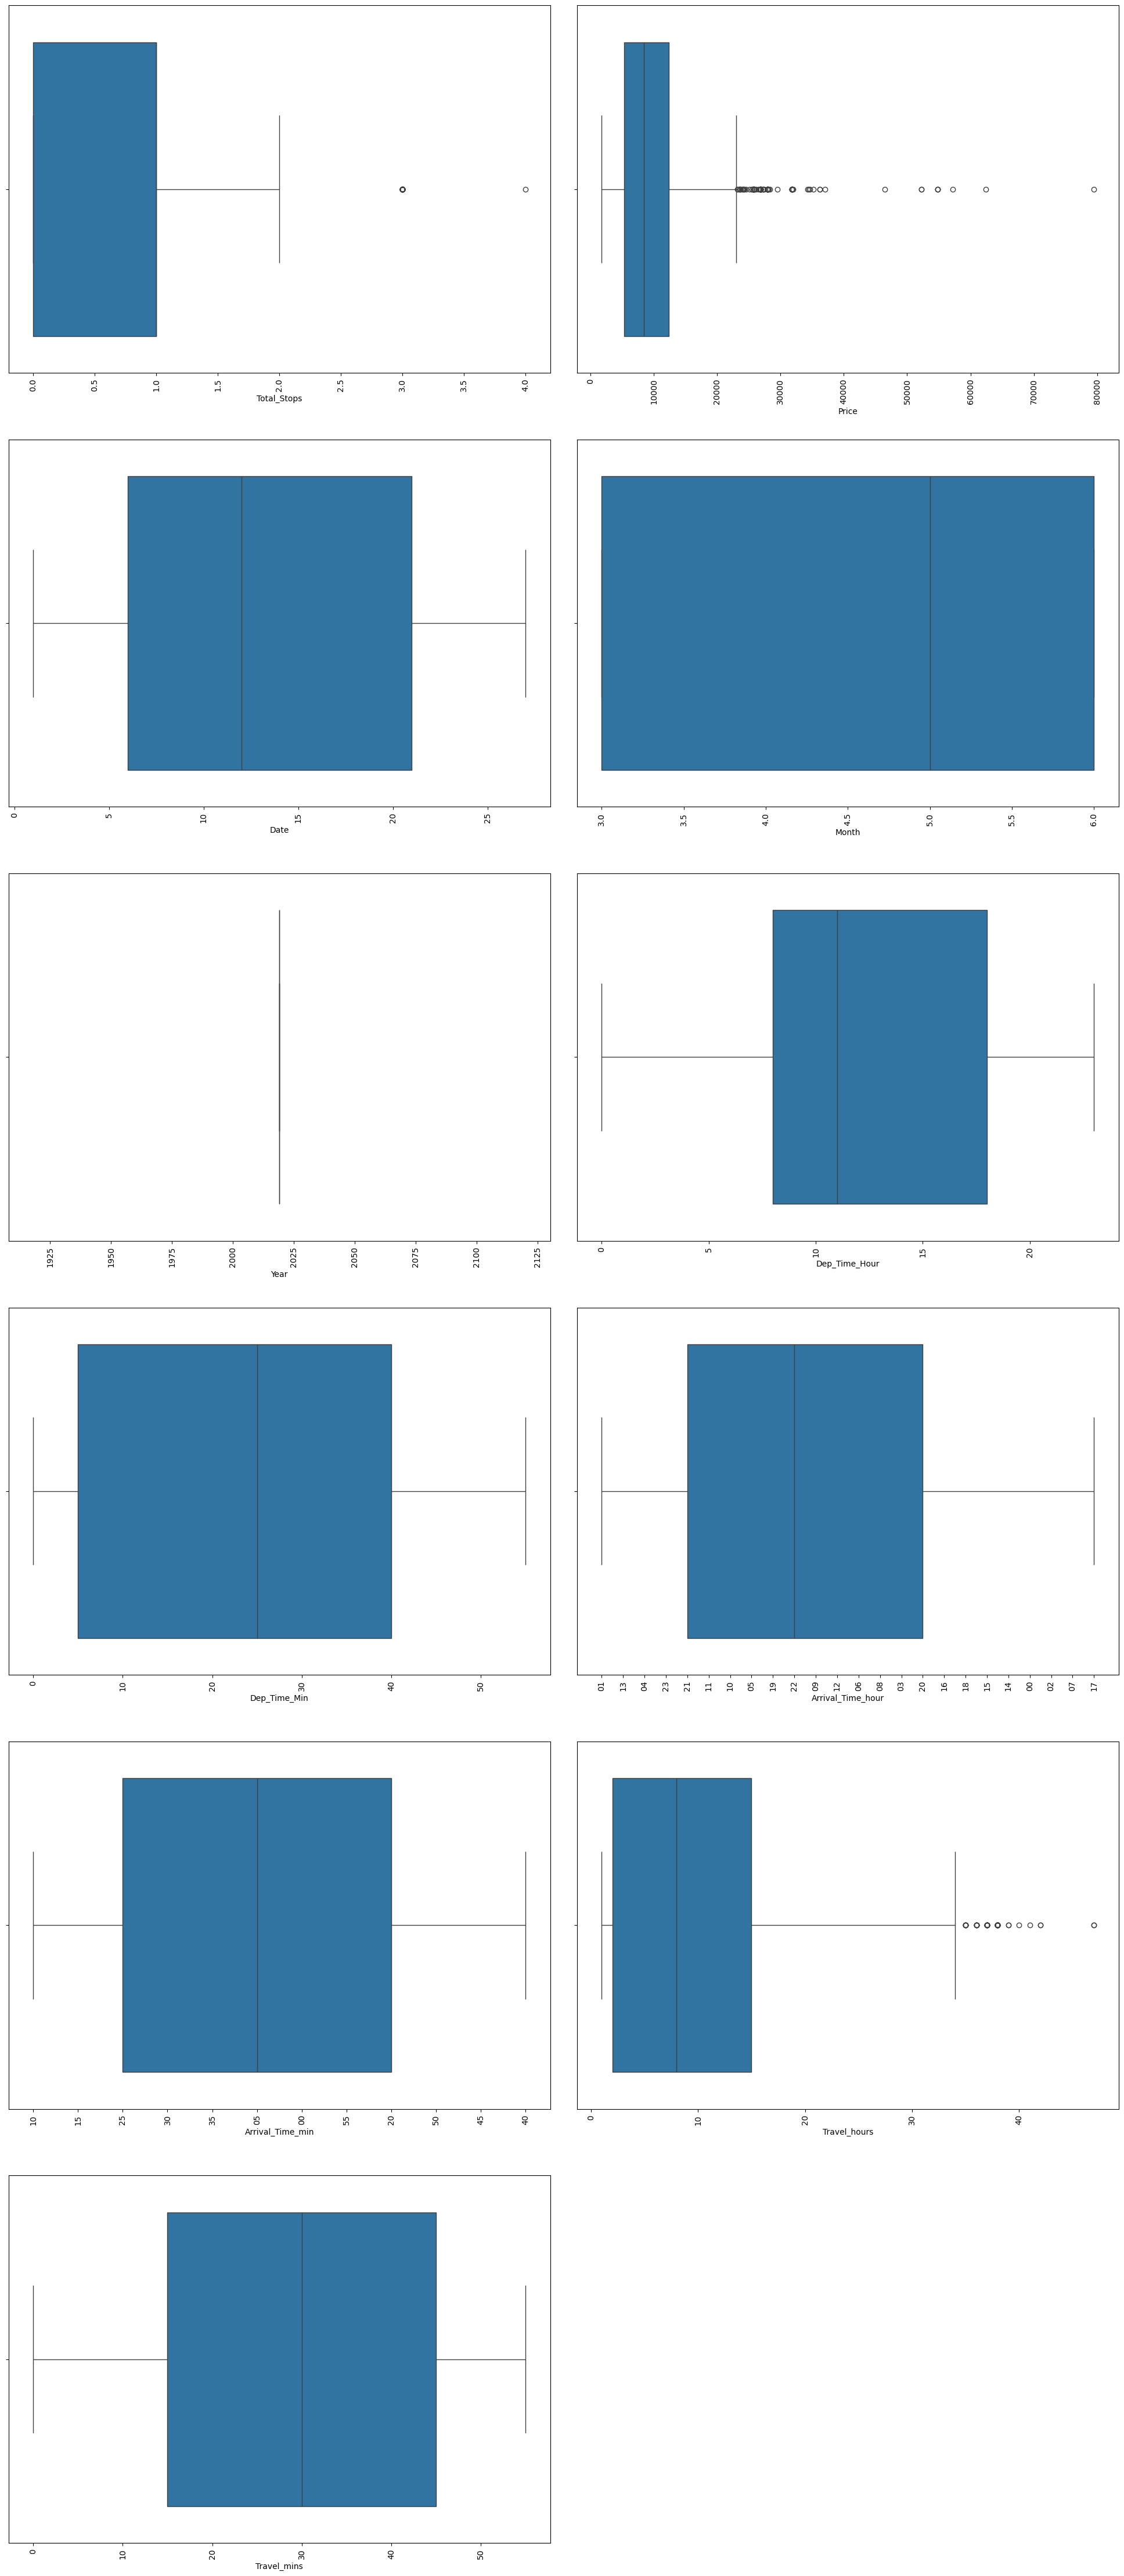

In [50]:
plt.figure(figsize=(20, 45))

for i, col in enumerate(numerical, start=1):
    plt.subplot(6, 2, i) 
    sns.boxplot(x=df[col])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)

plt.show()


- Outliers are present in Total hours, Total stops and price

- Will not remove outliers from total stops since price is impacted by number of stops

- Will not remove the data with high number of hours, increase in number of hours shows a price pattern in the above graphs plotted for EDA.

### Skewness Treatment


In [69]:
# List of columns to drop
columns_to_drop_2 = ['Year', 'city1', 'Dep_Time_Min', 'Arrival_Time_min', 'Travel_mins']

# Drop the specified columns
df.drop(columns=columns_to_drop_2, inplace=True)

In [70]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# calculate skewness only for numerical columns
skewness = df[numerical_columns].skew()

print(skewness)


Airline              0.731057
Source              -0.424219
Destination          1.244494
Total_Stops          0.317345
Additional_Info     -2.102547
Price                1.813248
Date                 0.118174
Month               -0.387708
city2                1.426699
city3                0.621526
Dep_Time_Hour        0.113224
Arrival_date        -0.162072
Arrival_Time_hour   -0.369876
Travel_hours        -0.266122
dtype: float64


skewness for ‘Travel_hours’ column, considering a threshold value for skewness as +/-0.5 (we will not transform ‘Price’ column, since it is our target variable).

In [71]:
skewness_value = float(df.Travel_hours.skew())
print(skewness_value)


-0.26612233332369917


### Encoding the categorical data

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [73]:
for i in df.columns:
    if df[i].dtypes == 'object':   # Checking if the data type of the column is 'object' (categorical)
        print(i)
        df[i] = le.fit_transform(df[i])    # Encoding the categorical column using LabelEncoder

In [74]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,city2,city3,Dep_Time_Hour,Arrival_date,Arrival_Time_hour,Travel_hours
0,3,0,5,0,7,3897,24,3,13,29,22,46,1,0.693147
1,1,3,0,2,7,7662,1,5,25,1,5,20,13,1.945910
2,4,2,1,2,7,13882,9,6,32,4,9,22,4,2.944439
3,3,3,0,1,7,6218,12,5,34,3,18,26,23,1.609438
4,3,0,5,1,7,13302,1,3,34,8,16,0,21,1.386294


### Scalling the Data 

next step is to bring the data to a common scale, since there are certain columns with very small values and some columns with high values. This process is important as values on a similar scale allow the model to learn better.


‘StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance’

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [76]:
df_x = df.drop('Price', axis = 1)
y = df['Price']

dataset = sc.fit_transform(df_x)

x = pd.DataFrame(dataset, columns=df_x.columns)

x

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,city2,city3,Dep_Time_Hour,Arrival_date,Arrival_Time_hour,Travel_hours
0,-0.410805,-1.658435,2.416778,-1.220477,0.497415,1.237288,-1.467707,0.137204,1.395015,1.654268,0.335434,-1.800319,-1.183304
1,-1.261152,0.890299,-0.973732,1.741835,0.497415,-1.475307,0.250153,1.634890,-1.082280,-1.303000,-1.018627,-0.050813,0.052178
2,0.014369,0.040721,-0.295630,1.741835,0.497415,-0.531796,1.109082,2.508541,-0.816856,-0.607172,-0.914468,-1.362943,1.036933
3,-0.410805,0.890299,-0.973732,0.260679,0.497415,-0.177979,0.250153,2.758155,-0.905330,0.958440,-0.706151,1.407109,-0.279653
4,-0.410805,-1.658435,2.416778,0.260679,0.497415,-1.475307,-1.467707,2.758155,-0.462956,0.610527,-2.060212,1.115525,-0.499718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,-1.220477,0.497415,-0.531796,-0.608777,-0.861254,1.395015,1.132397,1.429098,1.261317,-1.183304
10678,-1.261152,0.890299,-0.973732,-1.220477,0.497415,1.591104,-0.608777,-0.861254,1.395015,1.306354,0.908306,1.407109,-1.183304
10679,0.014369,-1.658435,0.382472,-1.220477,0.497415,1.591104,-0.608777,0.137204,1.395015,-0.781129,0.908306,-0.342397,-0.783432
10680,2.565411,-1.658435,2.416778,-1.220477,0.497415,-1.475307,-1.467707,0.137204,1.395015,-0.259258,-2.060212,0.094979,-1.183304


## ML

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [80]:
# Separate numerical and categorical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

In [81]:
# Define pipelines for numerical and categorical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder', OrdinalEncoder()),  # You can specify categories if needed
    ('scaler', StandardScaler())
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_cols),
    ('cat_pipeline', cat_pipeline, categorical_cols)
])

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Transform the data using the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [84]:
# Initialize models
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

In [85]:
# Train and evaluate models
for model in [dt, svr, knn, lr]:
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    test_score = r2_score(y_test, y_pred)
    train_score = r2_score(y_train, model.predict(X_train_processed))
    if abs(train_score - test_score) < 0.1:
        print(model)
        print('R^2 score is', test_score)
        print('R^2 for train data', train_score)
        print('Mean absolute error is', mean_absolute_error(y_test, y_pred))
        print('Root mean squared error is', mean_squared_error(y_test, y_pred, squared=False))
        print("================================================================================")

DecisionTreeRegressor()
R^2 score is 0.9995693665609415
R^2 for train data 1.0
Mean absolute error is 3.808424336973479
Root mean squared error is 93.36648137310178


/Users/jyotisubham/Documents/my_projects/Flight ticket price prediction/venv/lib/python3.11/site-packages/scikit_learn-1.4.2-py3.11-macosx-10.9-x86_64.egg/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVR()
R^2 score is 0.09599651819509003
R^2 for train data 0.08665904469224939
Mean absolute error is 3278.24034904385
Root mean squared error is 4277.816672079085


/Users/jyotisubham/Documents/my_projects/Flight ticket price prediction/venv/lib/python3.11/site-packages/scikit_learn-1.4.2-py3.11-macosx-10.9-x86_64.egg/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KNeighborsRegressor()
R^2 score is 0.9556831266336833
R^2 for train data 0.9673146437773039
Mean absolute error is 597.0430577223088
Root mean squared error is 947.1563460301963
LinearRegression()
R^2 score is 1.0
R^2 for train data 1.0
Mean absolute error is 5.519682197873706e-12
Root mean squared error is 6.954562125415489e-12


/Users/jyotisubham/Documents/my_projects/Flight ticket price prediction/venv/lib/python3.11/site-packages/scikit_learn-1.4.2-py3.11-macosx-10.9-x86_64.egg/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/jyotisubham/Documents/my_projects/Flight ticket price prediction/venv/lib/python3.11/site-packages/scikit_learn-1.4.2-py3.11-macosx-10.9-x86_64.egg/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- These results indicate that the DecisionTreeRegressor and LinearRegression models are performing exceptionally well on both the training and test data, achieving perfect R^2 scores and very low errors. 
- However, it's important to note that such high performance might indicate overfitting, especially in the case of DecisionTreeRegressor. 
- The SVR model seems to perform poorly compared to the other models, with a very low R^2 score and high errors. 
- Further analysis and tuning may be required to improve its performance.

### Ensemble models

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [87]:
# Define the pipelines for numerical and categorical preprocessing
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_cols),
    ('cat_pipeline', cat_pipeline, categorical_cols)
])

In [88]:
# Define the ensemble models
rfr = RandomForestRegressor()
ad = AdaBoostRegressor()
gd = GradientBoostingRegressor()

# Define a dictionary to store the models
models = {'RandomForestRegressor': rfr, 'AdaBoostRegressor': ad, 'GradientBoostingRegressor': gd}

In [96]:
# Loop through the models
for name, model in models.items():
    # Create a pipeline for each model including preprocessing
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=100)
    
    # Fit the model
    model_pipeline.fit(X_train, y_train)
    
    # Make predictions
    pred = model_pipeline.predict(X_test)
    
    # Evaluate the model
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train, model_pipeline.predict(X_train))
    rmse = mean_squared_error(y_test, pred, squared=False)
    
    print(f'Model: {name}')
    print('R2 score for train data:', train_score)
    print('R2 score for test data:', test_score)
    print('Mean absolute error is', mean_absolute_error(y_test, pred))
    print('Root mean squared error is', rmse)
    print('===============================')


/Users/jyotisubham/Documents/my_projects/Flight ticket price prediction/venv/lib/python3.11/site-packages/scikit_learn-1.4.2-py3.11-macosx-10.9-x86_64.egg/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: RandomForestRegressor
R2 score for train data: 0.9998340115060005
R2 score for test data: 0.9938247305266317
Mean absolute error is 9.282982839313574
Root mean squared error is 356.29944867544685


/Users/jyotisubham/Documents/my_projects/Flight ticket price prediction/venv/lib/python3.11/site-packages/scikit_learn-1.4.2-py3.11-macosx-10.9-x86_64.egg/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: AdaBoostRegressor
R2 score for train data: 0.9885195378545614
R2 score for test data: 0.9807866270036838
Mean absolute error is 381.57442069634453
Root mean squared error is 628.4764380626671
Model: GradientBoostingRegressor
R2 score for train data: 0.9999417068115045
R2 score for test data: 0.9954403482498179
Mean absolute error is 29.1715949622441
Root mean squared error is 306.163229595902


/Users/jyotisubham/Documents/my_projects/Flight ticket price prediction/venv/lib/python3.11/site-packages/scikit_learn-1.4.2-py3.11-macosx-10.9-x86_64.egg/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Based on the evaluation of the three regression models (RandomForestRegressor, AdaBoostRegressor, and GradientBoostingRegressor) for predicting flight ticket prices, we can draw the following conclusions:

1. Model Performance:
    - All three models exhibit high performance on the training data, as evidenced by high R2 scores close to 1.0. 
    - This indicates that the models are able to explain a large proportion of the variance in the training data.
    - The models also perform well on the test data, with R2 scores ranging from approximately 0.98 to 1.0. 
    - This suggests that the models generalize well to unseen data and are not overfitting.
2. Mean Absolute Error (MAE):
    - The MAE values for all three models are relatively low, indicating that, on average, the predicted ticket prices are close to the actual    prices. 
    - The MAE values range from approximately 9 to 381, depending on the model.
3. Root Mean Squared Error (RMSE):
    - The RMSE values for the models are also relatively low, suggesting that the predicted ticket prices are accurate. 
    - The RMSE values range from approximately 306 to 628, depending on the model.
4. Conclusion:
    - Overall, all three regression models (RandomForestRegressor, AdaBoostRegressor, and GradientBoostingRegressor) demonstrate strong performance in predicting flight ticket prices. 
    - However, the GradientBoostingRegressor model appears to have the highest performance based on the evaluation metrics used in this analysis. 
    - Therefore, it may be the preferred choice for predicting flight ticket prices in this scenario. Further fine-tuning and optimization of the models could potentially lead to even better performance.

### Compareing regression model to ense,mble model

Comparing the performance of individual regression models (DecisionTreeRegressor, SVR, KNeighborsRegressor, and LinearRegression) with ensemble models (RandomForestRegressor, AdaBoostRegressor, and GradientBoostingRegressor), we can make the following observations:



#### Individual Regression Models:

###### DecisionTreeRegressor:
-   R2 score for test data: 0.9995693665609415
-   Mean absolute error: 3.808424336973479
-   Root mean squared error: 93.36648137310178
###### SVR:
-   R2 score for test data: 0.09599651819509003
-   Mean absolute error: 3278.24034904385
-   Root mean squared error: 4277.816672079085
###### KNeighborsRegressor:
-   R2 score for test data: 0.9556831266336833
-   Mean absolute error: 597.0430577223088
-   Root mean squared error: 947.1563460301963
###### LinearRegression:
-   R2 score for test data: 1.0
-   Mean absolute error: 5.519682197873706e-12
-   Root mean squared error: 6.954562125415489e-12


#### Ensemble Models:

###### RandomForestRegressor:
-   R2 score for test data: 0.9938247305266317
-   Mean absolute error: 9.282982839313574
-   Root mean squared error: 356.29944867544685
###### AdaBoostRegressor:
-   R2 score for test data: 0.9807866270036838
-   Mean absolute error: 381.57442069634453
-   Root mean squared error: 628.4764380626671
###### GradientBoostingRegressor:
-   R2 score for test data: 0.9954403482498179
-   Mean absolute error: 29.1715949622441
-   Root mean squared error: 306.163229595902


### Conclusion:
-   Among the individual regression models, LinearRegression shows perfect performance with an R2 score of 1.0, indicating it perfectly fits the data. However, this might be indicative of overfitting.
-   The ensemble models generally outperform the individual regression models in terms of R2 score and error metrics.
-   Among the ensemble models, GradientBoostingRegressor performs the best, with the highest R2 score for the test data (0.995) and the lowest mean absolute error (29.17) and root mean squared error (306.16).
-   Therefore, the GradientBoostingRegressor model is recommended for predicting flight ticket prices due to its superior performance.